In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns
from seaborn import kdeplot
from datetime import datetime

In [3]:
df = pd.read_csv('C:/Users/User/Desktop/Walmart sales/Walmart_Store_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Date'] = df['Date'].dt.strftime('%m-%d-%Y')

In [5]:
df_groupby = df.groupby('Store')['Weekly_Sales'].sum()
print("Store Number {} has maximum Sales. Sum of Total Sales {}".format(df_groupby.idxmax
(),df_groupby.max()))

Store Number 20 has maximum Sales. Sum of Total Sales 301397792.46


In [6]:
df_std = df.groupby('Store').agg({'Weekly_Sales':'std'})
print("Store Number {} has maximum Standard Deviation. STD {}".format(df_std['Weekly_Sales'].idxmax(),df_std['Weekly_Sales'].max()))

Store Number 14 has maximum Standard Deviation. STD 317569.9494755081


In [7]:
df_std = df.groupby('Store').agg({'Weekly_Sales':['mean','std']})
df_std.head()

Weekly_Sales               
               mean            std
Store                             
1      1.555264e+06  155980.767761
2      1.925751e+06  237683.694682
3      4.027044e+05   46319.631557
4      2.094713e+06  266201.442297
5      3.180118e+05   37737.965745

In [8]:
df_Q32012 = df[(pd.to_datetime(df['Date']) >= pd.to_datetime('07-01-2012')) & (pd.to_datetime(df['Date']) <= pd.to_datetime('09-30-2012'))]
df_growth = df_Q32012.groupby(['Store'])['Weekly_Sales'].sum()
print("Store Number {} has Good Quartely Growth in Q3'2012 {}".format(df_growth.idxmax(),df_growth.max()))

Store Number 4 has Good Quartely Growth in Q3'2012 27796792.46


In [9]:
# Stores Holiday Sales
stores_holiday_sales = df[df['Holiday_Flag'] == 1]

In [10]:
# Stores Weekday Sales
stores_nonholiday_sales = df[df['Holiday_Flag'] == 0]

In [11]:
stores_holiday_sales_superBowl = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('12-02-2010')) |(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('11-02-2011'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('10-02-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('08-02-2013'))]

In [12]:
stores_holiday_sales_labourDay = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('10-09-2010')) |(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('09-09-2011'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('07-09-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('06-09-2013'))]

In [13]:
#Stores Sales in Thanks Giving
#Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
stores_holiday_sales_thanksgiving = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('11-26-2010')) |(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('11-25-2011'))|(pd.to_datetime(stores_holiday_sales['Date']) ==
pd.to_datetime('11-23-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('11-29-2013'))]

In [14]:
#Stores Sales in Christmas
# Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
stores_holiday_sales_Christmas = stores_holiday_sales[(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('12-31-2010')) |(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('12-30-2011'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('12-28-2012'))|(pd.to_datetime(stores_holiday_sales['Date']) == pd.to_datetime('12-27-2013'))]
stores_nonholiday_sales_mean = stores_nonholiday_sales.groupby(['Date']).agg({'Weekly_Sales':'mean'}).reset_index()
stores_holiday_sales_sum = stores_holiday_sales.groupby(['Date']).agg({'Weekly_Sales':'sum'}).reset_index()

In [15]:
for row in stores_holiday_sales_sum.itertuples():
    for row1 in stores_nonholiday_sales_mean.itertuples():
        if row.Weekly_Sales > row1.Weekly_Sales:
            print("On this Date {} Holiday Sales is greater than Non Holiday Sales and the Sales :- {}".format(row.Date,row.Weekly_Sales))
            break;

On this Date 02-10-2012 Holiday Sales is greater than Non Holiday Sales and the Sales :- 50009407.92
On this Date 02-11-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 47336192.79
On this Date 02-12-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :- 48336677.63
On this Date 09-07-2012 Holiday Sales is greater than Non Holiday Sales and the Sales :- 48330059.31
On this Date 09-09-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 46763227.53
On this Date 09-10-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :- 45634397.839999996
On this Date 11-25-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 66593605.26
On this Date 11-26-2010 Holiday Sales is greater than Non Holiday Sales and the Sales :- 65821003.24
On this Date 12-30-2011 Holiday Sales is greater than Non Holiday Sales and the Sales :- 46042461.04
On this Date 12-31-2010 Holiday Sales is greater than Non Holiday Sales and the Sale

In [16]:
print("Super Bowl Day Sale",stores_holiday_sales_superBowl['Weekly_Sales'].sum())
print("Labour Day Sale",stores_holiday_sales_labourDay['Weekly_Sales'].sum())
print("Thanksgiving Day Sale",stores_holiday_sales_thanksgiving['Weekly_Sales'].sum())
print("Christmas Day Sale",stores_holiday_sales_Christmas['Weekly_Sales'].sum())

Super Bowl Day Sale 0.0
Labour Day Sale 46763227.529999994
Thanksgiving Day Sale 132414608.5
Christmas Day Sale 86474980.03999999


In [17]:
x_features_object = df[df['Store'] ==1][['Store','Date']]
date_obj = df[df['Store'] ==1][['Date']]
date_obj.index +=1
x_features_object.Date = date_obj.index
x_features_object.head()

,Store,Date
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [18]:
y_target = df[df['Store'] ==1]['Weekly_Sales']
y_target.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_features_object,y_target,random_state=1)

In [20]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
feature_dataset = df[df['Store'] ==1][['Store','CPI','Unemployment','Fuel_Price']]
feature_dataset.head()

,Store,CPI,Unemployment,Fuel_Price
0,1,211.096358,8.106,2.572
1,1,211.242170,8.106,2.548
2,1,211.289143,8.106,2.514
3,1,211.319643,8.106,2.561
4,1,211.350143,8.106,2.625


In [21]:
response_set_cpi = df[df['Store'] ==1]['CPI'].astype('int64')
response_set_unemployment = df[df['Store'] ==1]['Unemployment'].astype('int64')

In [22]:
from sklearn.model_selection import train_test_split
x_train_cpi,x_test_cpi,y_train_cpi,y_test_cpi = train_test_split(feature_dataset,response_set_cpi,random_state=1)
x_train_unemp, x_test_unemp, y_train_unemp, y_test_unemp = train_test_split(feature_dataset,response_set_unemployment,random_state=1)

In [23]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train_cpi,y_train_cpi)
y_pred = logreg.predict(x_test_cpi)
logreg.fit(x_train_unemp,y_train_unemp)
#y_pred_unemp = logreg.predict(x_test_unemp)

LogisticRegression(max_iter=10000)

In [24]:
y_pred_unemp = logreg.predict(x_test_unemp)

In [25]:
from sklearn import metrics
print(metrics.accuracy_score(y_test_cpi,y_pred))
print(metrics.accuracy_score(y_test_unemp,y_pred_unemp))

0.7222222222222222
0.9444444444444444


In [26]:
print('cpi actual :', y_test_cpi.values[0:30])
print('cpi Predicted :', y_pred[0:30])
print('actual Unemployment :', y_test_unemp.values[0:30])
print('Predicted Unemployment :', y_pred_unemp[0:30])

cpi actual : [215 221 211 211 221 211 210 211 215 217 221 212 216 218 211 210 211 217
 215 211 212 217 221 219 214 211 211 219 215 219]
cpi Predicted : [215 221 211 211 221 211 211 211 215 215 221 211 215 218 211 211 211 217
 215 211 211 217 221 220 215 211 211 221 215 220]
actual Unemployment : [7 7 7 8 7 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
Predicted Unemployment : [7 7 7 7 6 7 7 7 7 7 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]


In [27]:
comparison_df = pd.DataFrame({'cpi Actual' : y_test_cpi.values[0:30], 'cpi Predicted' : y_pred[0:30]})
comparison_df

,cpi Actual,cpi Predicted
0,215,215
1,221,221
2,211,211
3,211,211
4,221,221
5,211,211
6,210,211
7,211,211
8,215,215
9,217,215


In [28]:
comparison_df = pd.DataFrame({'actual Unemployment' : y_test_cpi.values[0:30], 'Predicted Unemployment' : y_pred[0:30]})
comparison_df

,actual Unemployment,Predicted Unemployment
0,215,215
1,221,221
2,211,211
3,211,211
4,221,221
5,211,211
6,210,211
7,211,211
8,215,215
9,217,215


In [29]:
df['Day'] = pd.to_datetime(df['Date']).dt.day_name()
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day
0,1,02-05-2010,1643690.90,0,42.31,2.572,211.096358,8.106,Friday
1,1,02-12-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Friday
2,1,02-19-2010,1611968.17,0,39.93,2.514,211.289143,8.106,Friday
3,1,02-26-2010,1409727.59,0,46.63,2.561,211.319643,8.106,Friday
4,1,03-05-2010,1554806.68,0,46.50,2.625,211.350143,8.106,Friday


<Axes: xlabel='Unemployment', ylabel='Density'>

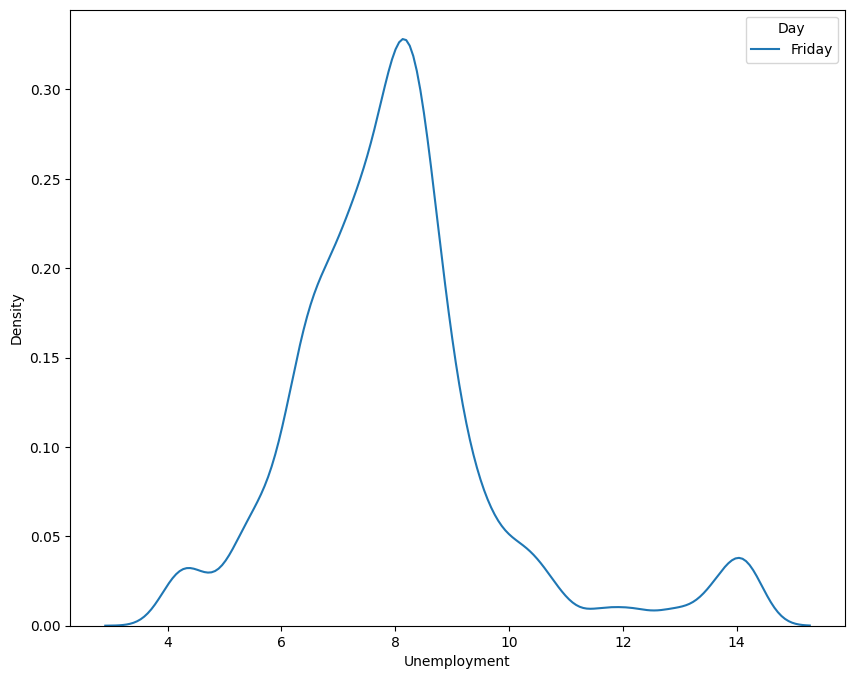

In [30]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'Unemployment', hue = 'Day', color = 'blue')

<Axes: xlabel='CPI', ylabel='Density'>

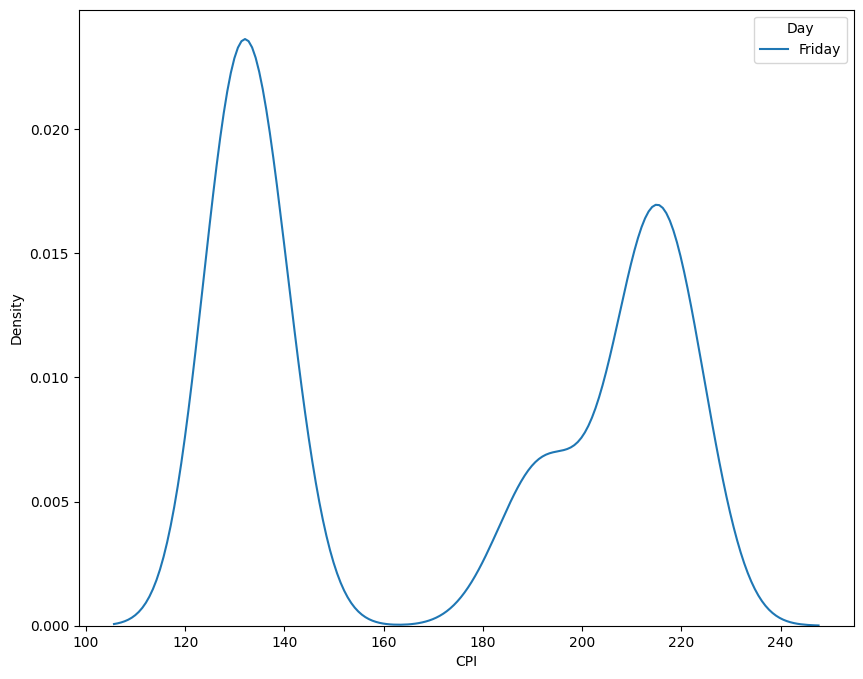

In [31]:
plt.figure(figsize=(10, 8))
kdeplot(data = df, x = 'CPI', hue = 'Day', color = 'blue')